### 1.Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


### 2.Loading the datset

In [2]:
Air_Quality = pd.read_csv("data.csv",encoding='cp1252',low_memory=False)

In [3]:
Air_Quality.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
Air_Quality.shape

(435742, 13)

In [5]:
Air_Quality.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [6]:
missing_ratio = np.round(Air_Quality.isna().sum()/len(Air_Quality)*100,2)
missing_ratio = pd.DataFrame(missing_ratio , columns=['Missing_Ratio'])
missing_ratio.sort_values('Missing_Ratio',ascending=False)

,Missing_Ratio
pm2_5,97.86
spm,54.48
agency,34.30
stn_code,33.06
rspm,9.23
so2,7.95
location_monitoring_station,6.31
no2,3.73
type,1.24
sampling_date,0.00


### Droping the columns

from above ratios we can say that pm2_5	and spm with 97.86 & 54.48 percentage of missing values.so we decided to drop those columns

In [7]:
Air_Quality.drop(["pm2_5","spm"] , axis=1 , inplace=True)

In [8]:
#Stn_code and Sampling_date(we have date column which is another representaion of theses values) also not an important columns so we drop it
Air_Quality.drop(["stn_code","sampling_date"] , axis=1 , inplace=True)

In [9]:
Air_Quality.head()

,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
0,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


### 3.Missing value handling in Categorical Features

In [10]:
categorical_cols = list(Air_Quality.select_dtypes(include=['object']).columns)
numerical_cols = list(Air_Quality.select_dtypes(exclude=['object']).columns)

In [11]:
print(categorical_cols)

['state', 'location', 'agency', 'type', 'location_monitoring_station', 'date']


In [12]:
print(numerical_cols)

['so2', 'no2', 'rspm']


In [13]:
Air_Quality[categorical_cols].isnull().sum()

state                               0
location                            3
agency                         149481
type                             5393
location_monitoring_station     27491
date                                7
dtype: int64

In [14]:
#Here location has 3 missing values and date has three missing values which is very small ,so we are going to drop this values
Air_Quality=Air_Quality[Air_Quality['date'].isna()==False]
Air_Quality=Air_Quality[Air_Quality['location'].isna()==False]

In [15]:
#Type
Air_Quality['type'] = Air_Quality['type'].fillna('NA')

In [16]:
Air_Quality['type'].value_counts()

Residential, Rural and other Areas    179013
Industrial Area                        96089
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8979
Sensitive Areas                         5536
NA                                      5390
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

#### Observation
From the above information we can see that data belonging to the same Type of Area is given different names 
Example: Industrial Area denoted as Industrial Areas,Industrial,Industrial Area
The Types of Area can be categorized together as : 'Residential,Rural and Others(RRO)' , 'Industrial' , 'Sensitive' & 'NA'

In [17]:
Residential_str = 'Residential|RIRUO'
Industria_str = 'Industrial'
Sensitive_str = 'Sensitive'

In [18]:
rro_mask = Air_Quality['type'].str.contains(Residential_str , regex=True)
ind_mask = Air_Quality['type'].str.contains(Industria_str )
sen_mask = Air_Quality['type'].str.contains(Sensitive_str)

In [19]:
Air_Quality['type'][rro_mask] = 'RRO'
Air_Quality['type'][ind_mask] = 'Industrial'
Air_Quality['type'][sen_mask] = 'Sensitive'


In [20]:
Air_Quality['type'].value_counts()

RRO           267266
Industrial    148069
Sensitive      15010
NA              5390
Name: type, dtype: int64

In [21]:
Air_Quality['agency'].fillna('NA',inplace=True)
Air_Quality['location_monitoring_station'].fillna('NA',inplace=True)

In [22]:
Air_Quality[categorical_cols].isnull().sum()

state                          0
location                       0
agency                         0
type                           0
location_monitoring_station    0
date                           0
dtype: int64

#### Observation
Now we done with Categorical features it sis time for Numerical Features

### 4.Missing value Handling in Numerical features

   While we handling Numrical values we can use so many methods , Some of the are
    (1)Mean,Mode,Median imputation
    (2)Arbitary Value imputation

In [23]:
numerical_cols

['so2', 'no2', 'rspm']

In [24]:
Air_Quality['so2'].describe()

count    401092.000000
mean         10.829428
std          11.177239
min           0.000000
25%           5.000000
50%           8.000000
75%          13.700000
max         909.000000
Name: so2, dtype: float64

Distribution of SO2


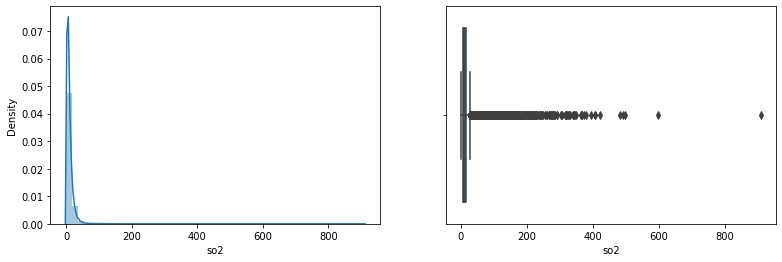

Skewness =  8.521026971966139


In [25]:
print('Distribution of SO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(Air_Quality['so2'].dropna() , ax=ax[0])
sns.boxplot(Air_Quality['so2'].dropna() , ax=ax[1])

so2_skew = Air_Quality['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

### Observation
The above distribution plot shows that 'so2' values are significantly Right Skewed(Positively Skewed)
and the box plot shows that there are significant amount of outliers

### Solution

Since we saw that 75% of the values lie under 13.7
we can calculate the upper limit using IQR(Inter Quartile Range) and
consider values outside upper limit as outliers and remove them


### IQR

The IQR describes the middle 50% of values when ordered from lowest to highest. To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1.



Distribution of SO2


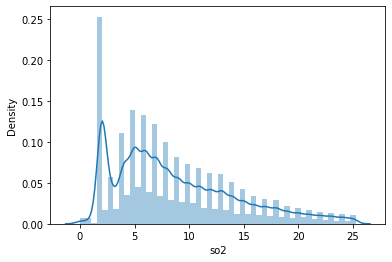

Skewness =  0.8502598289730563


In [41]:
Q1=Air_Quality['so2'].quantile(0.25)
Q3=Air_Quality['so2'].quantile(0.75)
IQR=Q3-Q1
Air_Quality=Air_Quality[~((Air_Quality['so2']<(Q1-1.5*IQR))|(Air_Quality['so2']>(Q3+1.5*IQR)))]

print('Distribution of SO2')
sns.distplot(Air_Quality['so2'].dropna())
so2_skew = Air_Quality['so2'].skew()
plt.show()
print('Skewness = ',so2_skew)

### Observation
The above distribution plot shows the significant Positive Skewness has been reduced to acceptable level


Distribution of SO2


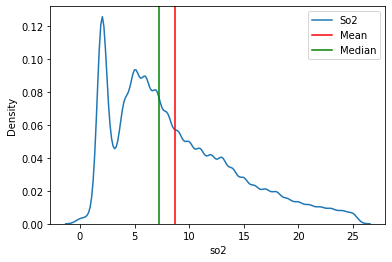

In [42]:
print('Distribution of SO2')
sns.kdeplot(Air_Quality['so2'].dropna())
plt.axvline(Air_Quality['so2'].mean(), color='r')
plt.axvline(Air_Quality['so2'].median(), color='g')

plt.legend(['So2','Mean','Median'])
plt.show()

In [43]:
df1=Air_Quality.copy()
df2=Air_Quality.copy()

In [44]:
df1['so2'] = df1['so2'].fillna(df1['so2'].mean())
df2['so2'] = df2['so2'].fillna(method='ffill')


Distribution of SO2


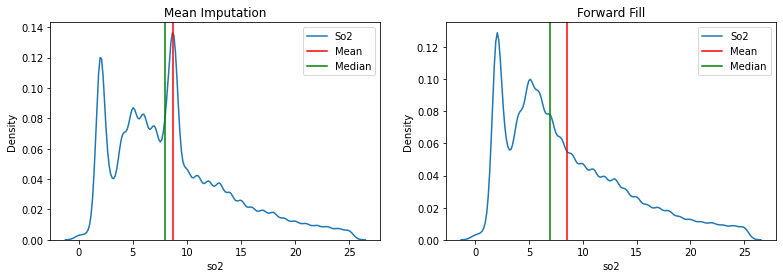

In [45]:
print('Distribution of SO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['so2'] , ax=ax[0])
ax[0].axvline(df1['so2'].mean(), color='r' )
ax[0].axvline(df1['so2'].median(), color='g')
ax[0].set_title('Mean Imputation')  
ax[0].legend(['So2','Mean','Median'])

sns.kdeplot(df2['so2'] , ax=ax[1])
ax[1].axvline(df2['so2'].mean(), color='r')
ax[1].axvline(df2['so2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['So2','Mean','Median'])
                    
                    
plt.show()

In [62]:
Air_Quality['so2'] = Air_Quality['so2'].fillna(method='ffill')

In [46]:
Q1=Air_Quality['no2'].quantile(0.25)
Q3=Air_Quality['no2'].quantile(0.75)
IQR=Q3-Q1
Air_Quality=Air_Quality[~((Air_Quality['no2']<(Q1-1.5*IQR))|(Air_Quality['no2']>(Q3+1.5*IQR)))]

Distribution of NO2


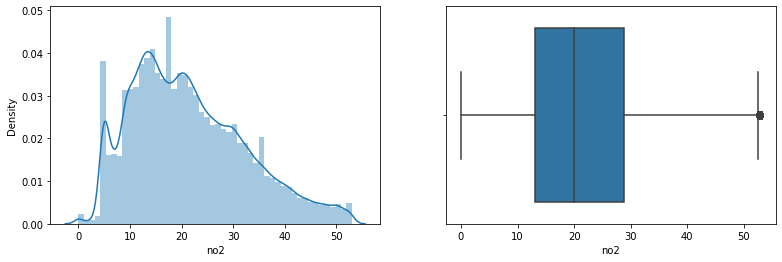

Skewness =  0.6123781091260613


In [47]:
print('Distribution of NO2')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(Air_Quality['no2'].dropna() , ax=ax[0])
sns.boxplot(Air_Quality['no2'].dropna() , ax=ax[1])
no2_skew = Air_Quality['no2'].skew()
plt.show()
print('Skewness = ',no2_skew)

Distribution of NO2


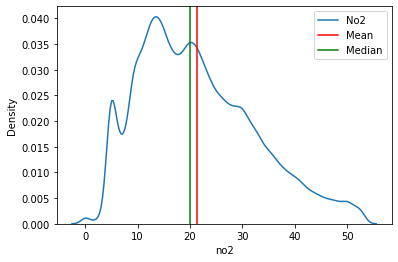

In [48]:
print('Distribution of NO2')
sns.kdeplot(Air_Quality['no2'])
plt.axvline(Air_Quality['no2'].mean(), color='r')
plt.axvline(Air_Quality['no2'].median(), color='g')
plt.legend(['No2','Mean','Median'])
plt.show()

In [49]:
df1 =Air_Quality.copy()
df2 =Air_Quality.copy()

In [50]:
#Mean Imputation
df1['no2'] = df1['no2'].fillna(df1['no2'].mean())
#Forward Fill
df2['no2'] = df2['no2'].fillna(method='ffill')

Distribution of NO2


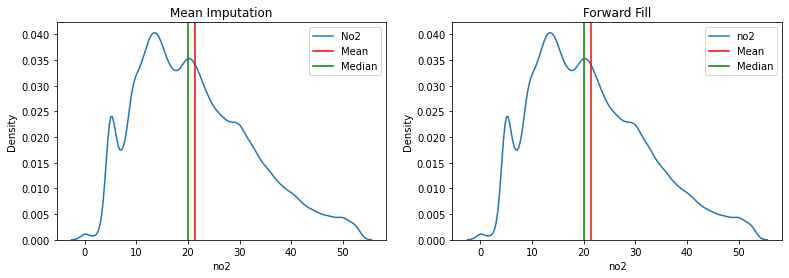

In [51]:
print('Distribution of NO2')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['no2'] , ax=ax[0])
ax[0].axvline(df1['no2'].mean(), color='r' )
ax[0].axvline(df1['no2'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['No2','Mean','Median'])

sns.kdeplot(df2['no2'] , ax=ax[1])
ax[1].axvline(df2['no2'].mean(), color='r')
ax[1].axvline(df2['no2'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['no2','Mean','Median'])
                    
                    
plt.show()

### Observation
The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [52]:
Air_Quality['no2'] =Air_Quality['no2'].fillna(method='ffill')

In [53]:
Air_Quality['rspm'].describe()

count    375760.000000
mean         97.158580
std          56.433092
min           0.000000
25%          54.000000
50%          84.000000
75%         130.000000
max         262.333333
Name: rspm, dtype: float64

Distribution of RSPM


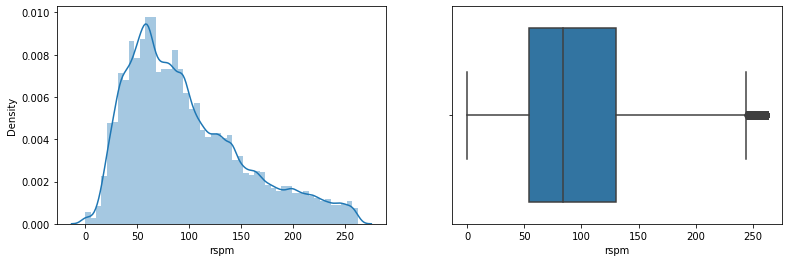

Skewness =  0.8758052216525788


In [54]:
print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(Air_Quality['rspm'].dropna() , ax=ax[0])
sns.boxplot(Air_Quality['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',Air_Quality['rspm'].skew())

Distribution of RSPM


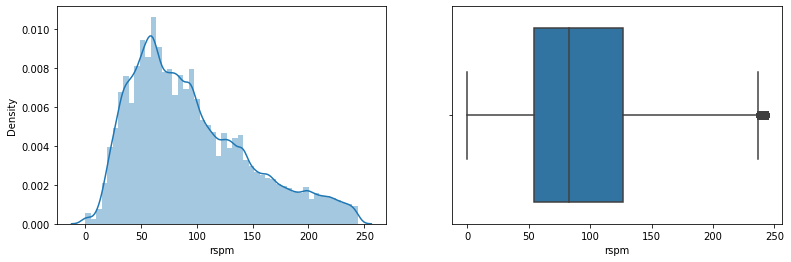

Skewness =  0.7912415779242497


In [55]:
Q1=Air_Quality['rspm'].quantile(0.25)
Q3=Air_Quality['rspm'].quantile(0.75)
IQR=Q3-Q1
Air_Quality=Air_Quality[~((Air_Quality['rspm']<(Q1-1.5*IQR))|(Air_Quality['rspm']>(Q3+1.5*IQR)))]

print('Distribution of RSPM')
fig,ax=plt.subplots(1,2,figsize=(13,4))
sns.distplot(Air_Quality['rspm'].dropna() , ax=ax[0])
sns.boxplot(Air_Quality['rspm'].dropna() , ax=ax[1])
plt.show()
print('Skewness = ',Air_Quality['rspm'].skew())

In [56]:
df1 = Air_Quality.copy()
df2 = Air_Quality.copy()

In [57]:
#Mean Imputation
df1['rspm'] = df1['rspm'].fillna(df1['rspm'].mean())
#Forward Fill
df2['rspm'] = df2['rspm'].fillna(method='ffill')

Distribution of RSPM


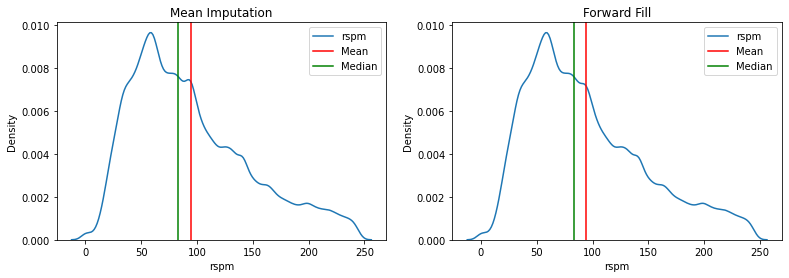

In [58]:
print('Distribution of RSPM')

fig,ax=plt.subplots(1,2,figsize=(13,4))

sns.kdeplot(df1['rspm'] , ax=ax[0])
ax[0].axvline(df1['rspm'].mean(), color='r' )
ax[0].axvline(df1['rspm'].median(), color='g')
ax[0].set_title('Mean Imputation')    
ax[0].legend(['rspm','Mean','Median'])

sns.kdeplot(df2['rspm'] , ax=ax[1])
ax[1].axvline(df2['rspm'].mean(), color='r')
ax[1].axvline(df2['rspm'].median(), color='g')
ax[1].set_title('Forward Fill')
ax[1].legend(['rspm','Mean','Median'])
                    
                    
plt.show()

### Observation
The above plots show that filling the missing values with Forward Fill dosen't cause any variation on the data, so we can choose Forward Fill

In [67]:
Air_Quality['rspm'] = Air_Quality['rspm'].fillna(method='bfill')


In [68]:
Air_Quality.isnull().sum()

state                          0
location                       0
agency                         0
type                           0
so2                            0
no2                            0
rspm                           0
location_monitoring_station    0
date                           0
dtype: int64

In [70]:
Air_Quality.tail()

,state,location,agency,type,so2,no2,rspm,location_monitoring_station,date
435734,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RRO,20.0,44.0,148.0,"Inside Rampal Industries,ULUBERIA",2015-12-15
435735,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RRO,17.0,44.0,131.0,"Inside Rampal Industries,ULUBERIA",2015-12-18
435736,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RRO,18.0,45.0,140.0,"Inside Rampal Industries,ULUBERIA",2015-12-21
435737,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RRO,22.0,50.0,143.0,"Inside Rampal Industries,ULUBERIA",2015-12-24
435738,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RRO,20.0,46.0,171.0,"Inside Rampal Industries,ULUBERIA",2015-12-29
